<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/6/68/Animation_portail_musique.gif" alt="Piano gif from Wikipedia" />
</p>

# PyWavelets and Jingle Bells

Part 1 for working with audio signals

---

## Overview
This notebook will generate a wavelet scalogram to determine the order of notes in a short .wav file. You'll learn how to generate a Wavelet Power spectrum graph

1. Prerequisites
2. Background
3. PyWavelets Overview
4. Wavelet Power Spectrum

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Matplotlib](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Necessary | Plotting on a data |
| [Intro to Pandas](https://foundations.projectpythia.org/core/pandas/pandas.html) | Necessary | Familiarity with working with dataframes |
| [Intro to Numpy](https://foundations.projectpythia.org/core/numpy/numpy-basics.html)| Necessary | Familiarity with working with arrays |
| [Intro to SciPy](https://docs.scipy.org/doc/scipy-1.13.1/tutorial/fft.html) | Helpful | Familiarity with working with .wav files |

- **Time to learn**: 20 minutes

---

## Background

Wavelet analysis is accomplished in Python via external package. [PyWavelets](https://pywavelets.readthedocs.io/en/latest/ref/cwt.html#pywt.cwt) is an open source Python package for wavelet analysis

```
pip install PyWavelets
```

## Imports

In [1]:
import numpy as np                          # working with arrays
import pandas as pd                         # working with dataframes
from scipy.io import wavfile                # loading in wav files
import matplotlib.pyplot as plt             # plot data
from scipy.fftpack import fft, fftfreq      # working with Fourier Transforms

import pywt                                 # PyWavelets

## PyWavelets Overview

```
coeffs, freqs = pywt.cwt(data, scales, wavelet, sampling_period)
```

### Input Values
- data: input data as a array_like
- scales: array_like collection of the scales to use (np.arange(s0, jtot, dj))
- wavelet: name of Mother wavelet
- sampling_period: optional sampling period for frequencies output

### Return Values
- coefs: array_like collection of complex number output for wavelet coefficients
- freqs: array_like collection of frequencies

### Choosing a Scale
### Scales vs. Frequency

The range of scales are a combination of s0, dj, and jtot. The musical range of frequenceis range from 261 - 494 Hz

| Note   | Freq   |
|--------|--------|
| A note | 440 hz |
| B note | 494 hz |
| C note | 261 hz |
| D note | 293 hz |
| E note | 330 hz |
| F note | 350 hz |
| G note | 392 hz |

It is good to include a range greater than needed to make clear bands for each frequency

```
sample_rate, signal_data = wavfile.read('jingle_bells.wav')
scales = np.arange(1, 40)
wavelet_coeffs, freqs = pywt.cwt(signal_data, scales, wavelet = "morl")
```

For example, scales from 1 to 40 represent a frequency (Hz) range from 8125 - 208.33 Hz

## Extract audio .wav file
The .wave input files contains infomration about the amplitude at every point in the file. The frequency of the note will determine which chord each part of the piece represents

In [2]:
sampleRate, signalData = wavfile.read("../data/jingle_bells.wav")

duration = len(signalData) / sampleRate
time = np.arange(0, duration, 1/sampleRate) 

print(f"Sample Rate: {sampleRate}")
print(f"duration = {duration} seconds (sample rate and audioBuffer = {len(signalData)} / {sampleRate}")
print(f"len of audio file = {len(signalData)}")
print(f"Total Length in time = {len(time)}")

Sample Rate: 10000
duration = 15.6991 seconds (sample rate and audioBuffer = 156991 / 10000
len of audio file = 156991
Total Length in time = 156991


## Let's Give the Data a Look!

It is always good practice to view the data that we have collected. First, let's organize the data into a `pandas` dataframe to organize the amplitude and time stamps

In [3]:
signal_df = pd.DataFrame({'time (seconds)': time, 'amplitude': signalData})
signal_df.head()

,time (seconds),amplitude
0,0.0000,-417
1,0.0001,-2660
2,0.0002,-2491
3,0.0003,6441
4,0.0004,-8540


### Plot a Small Sample of the .wav File

Plot a small subsample of the .wav to visualize the input data

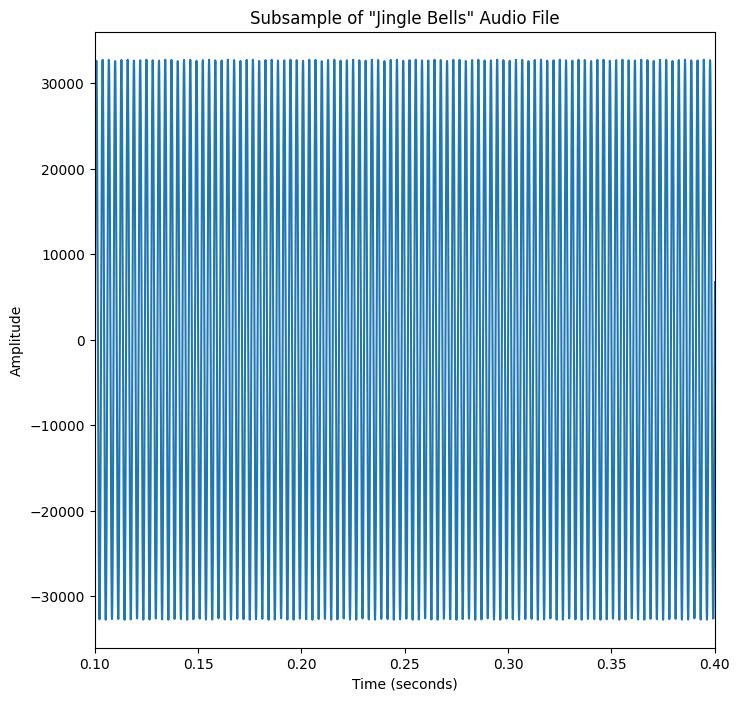

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
fig = plt.plot(signal_df["time (seconds)"], signal_df["amplitude"])
plt.title("Subsample of \"Jingle Bells\" Audio File")
ax.set_xlim(signal_df["time (seconds)"][1000], signal_df["time (seconds)"][4000])
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

## Power Spectrum

`wavelet_coeffs` is a complex number with a real and an imaginary number (1 + 2i). The power spectrum plots the real component of the complex number. The real component represents the magntiude of the wavelet coefficient displayed as the absolute value of the coefficients squared

Wavelet_coeff is a complex number with a real and an imaginary number (1 + 2i). The power spectrum plots the real component of the complex number

```
import numpy as np
real_component = np.log2(np.square(abs(wavelet_coeffs)))
```

The real component represents the magntiude of the wavelet coefficient

In [5]:
wavelet_mother = "morl" # morlet

# scale determines how squished or stretched a wavelet is
scales = np.arange(1, 40)
wavelet_coeffs, freqs = pywt.cwt(signalData, scales, wavelet = wavelet_mother)

# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
print(f"x-axis be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis be default is: {wavelet_coeffs.shape[0]}")

size (39, 156991) with 39 scales and 156991 time steps
x-axis be default is: 156991
y-axis be default is: 39


## Plot scalogram

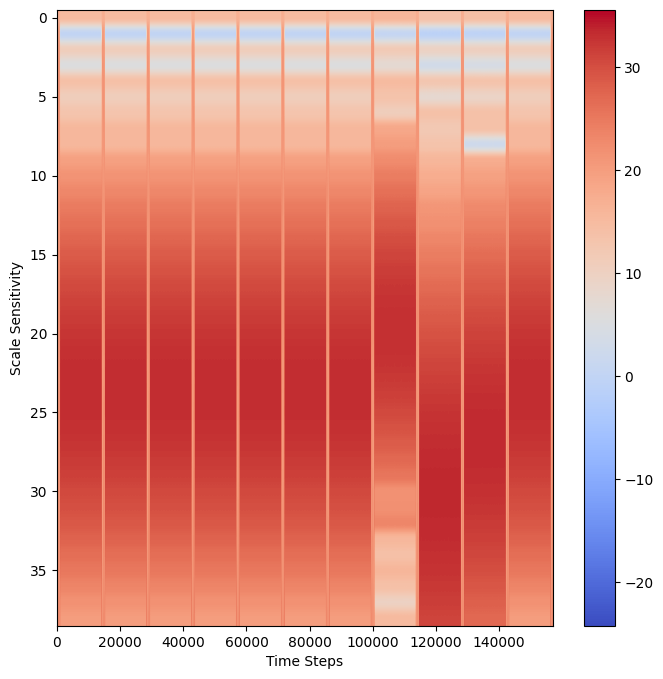

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
data = np.log2(np.square(abs(wavelet_coeffs))) # compare the magntiude
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.imshow(data, 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.show()

## Overlay Possible Frequencies

To overlay these frequencies with the wavelet scaologram:
<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
   To convert HZ frequency to a <code>scale = hz *.0001</code> (where 0.01 is 100 Hz sampling) then apply <code>frequency2scale</code>
</div>

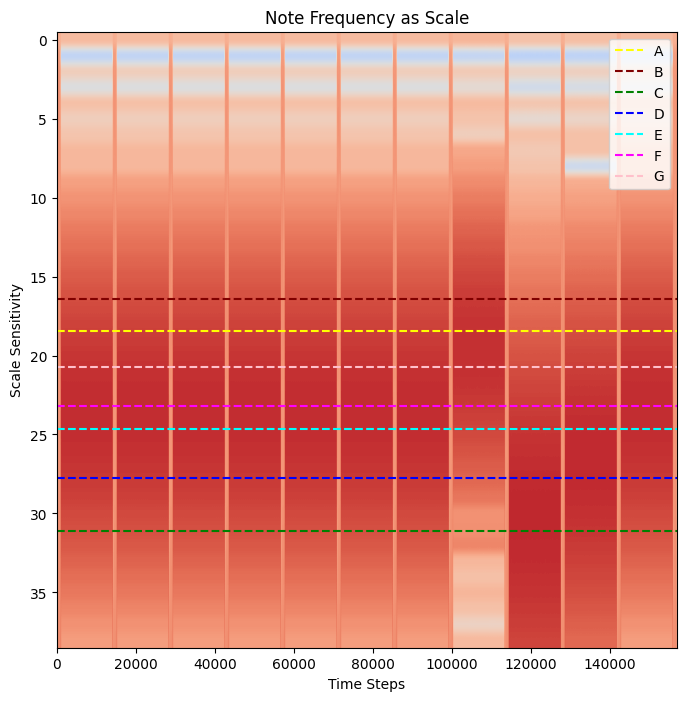

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay frequency of chords as dotted lines
sample_rate = 1/sampleRate
a_freq = pywt.frequency2scale(wavelet_mother, 440*sample_rate)
plt.axhline(y=a_freq, color='yellow', linestyle='--', label='A')
b_freq = pywt.frequency2scale(wavelet_mother, 494*sample_rate)
plt.axhline(y=b_freq, color="maroon", linestyle='--', label='B')
c_freq = pywt.frequency2scale(wavelet_mother, 261*sample_rate)
plt.axhline(y=c_freq, color='green', linestyle='--', label='C')
d_freq = pywt.frequency2scale(wavelet_mother, 293*sample_rate)
plt.axhline(y=d_freq, color='blue', linestyle='--', label='D')
e_freq = pywt.frequency2scale(wavelet_mother, 330*sample_rate)
plt.axhline(y=e_freq, color='cyan', linestyle='--', label='E')
f_freq = pywt.frequency2scale(wavelet_mother, 350*sample_rate)
plt.axhline(y=f_freq, color='fuchsia', linestyle='--', label='F')
g_freq = pywt.frequency2scale(wavelet_mother, 392*sample_rate)
plt.axhline(y=g_freq, color='pink', linestyle='--', label='G')

# Plot Power scalogram
power = np.log2(np.square(abs(wavelet_coeffs))) # compare the magntiude
plt.title("Note Frequency as Scale")
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.imshow(power, 
           vmax=(power).max(), vmin=(power).min(),
           cmap="coolwarm", aspect="auto")
plt.legend()
plt.show()

## Determining Which Frequencies to Overlay

For this example, we know that the input data is "Jingle Bells" so known which chords are going to be used

```
"Jingle Bells, Jingle Bells, Jingle All the Way" as EEE EEE EGCDE
```

However, let's imagine that we aren't sure. Wavelets gain information about _when_ a frequency occurs, but at a lower resolution to an exact frequnecy. To determine which chords are a best fit, you can make use of FFT to determinine which chords to include. Without FFT, the larger possible ranges of frequency can make it possible to confuse nearby chords.

### Fast Fourier Transform

In [8]:
fourier_transform = abs(fft(signalData))
freqs = fftfreq(len(fourier_transform), sample_rate)

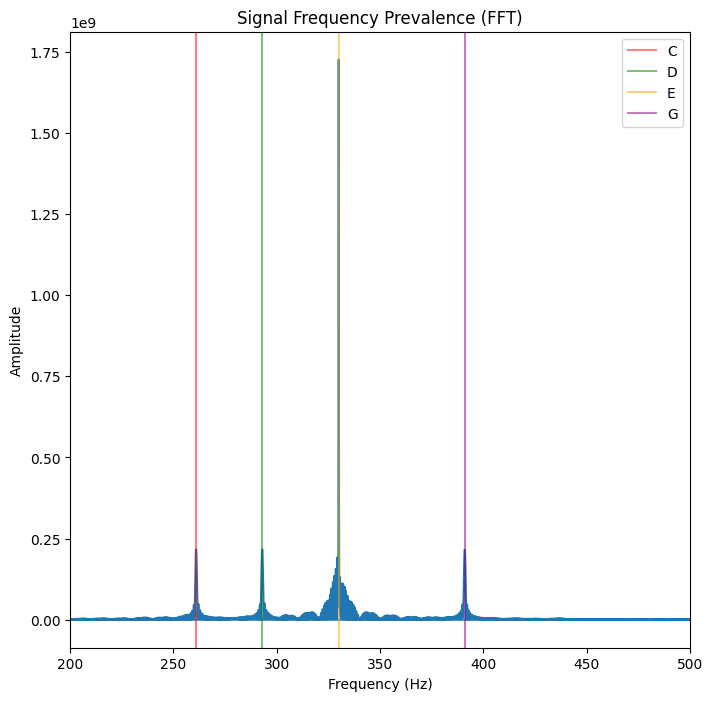

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
ax.set_xlim(left=200, right=500) 
plt.axvline(x=261, color="red", label="C",alpha=0.5)    # C Note: 261 hz
plt.axvline(x=293, color="green", label="D",alpha=0.5)  # D Note: 293 hz
plt.axvline(x=330, color="orange", label="E",alpha=0.5) # E Note: 330 hz
plt.axvline(x=391, color="purple", label="G",alpha=0.5) # G Note: 391 hz
plt.title("Signal Frequency Prevalence (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Overlay Frequency of Chords
Using FFT we can now say that there are four clear frequencies that are associated with four chords for CDEG

## Fast Fourier Transform Predicts Four Notes

FFT predicts an output with four notes: 

```
C, D, E, G
```
Let's plot the notes!

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay frequency of chords as dotted lines
sample_rate = 1/sampleRate
c_freq = pywt.frequency2scale(wavelet_mother, 261*sample_rate)
plt.axhline(y=c_freq, color='green', linestyle='--', label='C')
d_freq = pywt.frequency2scale(wavelet_mother, 293*sample_rate)
plt.axhline(y=d_freq, color='blue', linestyle='--', label='D')
e_freq = pywt.frequency2scale(wavelet_mother, 330*sample_rate)
plt.axhline(y=e_freq, color='cyan', linestyle='--', label='E')
g_freq = pywt.frequency2scale(wavelet_mother, 392*sample_rate)
plt.axhline(y=g_freq, color='pink', linestyle='--', label='G')

# Plot Power scalogram
power = np.log2(np.square(abs(wavelet_coeffs))) # compare the magntiude
plt.title("Note Frequency as Scale")
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.imshow(power, 
           vmax=(power).max(), vmin=(power).min(),
           cmap="coolwarm", aspect="auto")
plt.legend()
plt.show()

## Four Notes!

We have the order of the notes!
```
A, B, F, A
```

---

## Summary
Wavelets can report on both the frequency and time a frequency occurs. However, due to Heisenberg's Uncertainty Principle, by gaining resolution on time, some resolution on frequency is lost. It can be helpful to incoporate both a Fourier Transform and a Wavelet analysis to a signal to help determine the possible ranges of expected frequencies. `PyWavelets` is a free open-source package for wavelets in Python.

### What's next?

Up next: apply wavelets transform to determine the frequency _and_ order of an unknown input!